In [50]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import fbdp
import Liwc

from tqdm import tqdm_notebook as tqdm

In [54]:
parser = fbdp.FBDesktopParser(filename='../../../Downloads/Advice4Parenting-Posts.html')
parser.parse_posts()

,article_host,article_name,article_subtitle,hashtags,img-label,img_src,linked_profiles,links,text,timestamp
0,None,None,None,[],None,None,[Advice4Parenting],[http://advice4parenting.com/get-your-baby-to-...,Get your baby to sleep faster,"3/20/14, 5:04 PM"
1,None,None,None,[],None,None,[Advice4Parenting],[http://advice4parenting.com/parenting-tips-al...,Parenting Tips – All About Kid’s Health,"3/7/14, 12:22 PM"
2,None,None,None,[],None,None,[Advice4Parenting],[http://advice4parenting.com/4-tips-to-help-yo...,4 Tips to Help Your Nanny Discipline Your Kids,"2/10/14, 1:26 PM"
3,None,None,None,[],None,None,[Advice4Parenting],[http://advice4parenting.com/paying-it-forward...,Paying it Forward: Make Your Clothing Budget C...,"1/17/14, 3:57 PM"
4,None,None,None,[],None,None,[Advice4Parenting],[http://advice4parenting.com/work-examiner-for...,Work Examiner for Monitoring Children,"1/15/14, 2:42 PM"
5,None,None,None,[],None,None,[Advice4Parenting],[http://advice4parenting.com/best-convertible-...,Best Convertible Car Seat Buying Guide,"1/14/14, 3:16 PM"
6,None,None,None,[],None,None,[Advice4Parenting],[http://advice4parenting.com/money-lessons-for...,Money Lessons for Kids,"1/12/14, 1:43 AM"


In [4]:
def get_parsers(directory='Data/'):
    files = [file for file in os.listdir(directory) if file.endswith('.html')]
    parsers = []
    with tqdm(total=(len(files) * 6) + 1, smoothing=1) as pbar:
        def update_bar(func, *args, **kwargs):
            r = func(*args, **kwargs)
            pbar.update(1)
            return r
        liwc = Liwc.LiwcAnalyzer()
        pbar.update(1)
        for file in files:
            p = fbdp.FBDesktopParser(filename=os.path.join(directory, file))
            pbar.update(1)
            update_bar(p.parse_posts)
            update_bar(p.extract_features)
            liwc_posts = update_bar(liwc.parse, p.posts.text)
            update_bar(p.join_features, liwc_posts)
            update_bar(parsers.append, p)
        pbar.close()
    return parsers
pages = get_parsers()

In [63]:
numeric_pages = [p.posts._get_numeric_data() for p in pages]

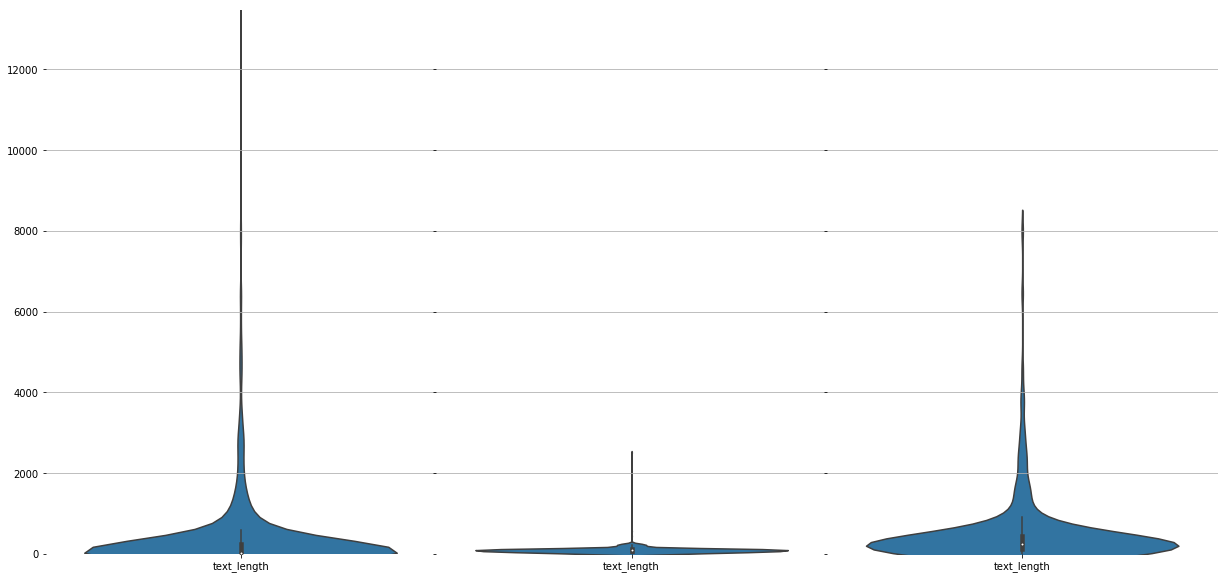

In [64]:
def violin_compare(dataframes, column, axes=None, **kwargs):
    if not axes:
        fig, axes = plt.subplots(ncols=len(dataframes), nrows=1, figsize=(21, 10), sharey=True)
    extrema = [(d[[column]].min()[0], d[[column]].max()[0]) for d in dataframes]
    extrema = min(extrema, key=lambda x: x[0])[0], max(extrema, key=lambda x: x[1])[1]
    for i, df in enumerate(dataframes):
        sns.violinplot(data=df[[column]], ax=axes[i], **kwargs)
        axes[i].set_ylim(extrema)
        for spine in axes[i].spines:
            axes[i].spines[spine].set_visible(False)
            axes[i].yaxis.grid(True)
    plt.subplots_adjust(wspace=0, hspace=0)
violin_compare(numeric_pages, 'text_length')

In [66]:
numeric_pages[0].columns

Index(['has_article', 'text_length', 'num_hashtags', 'has_text',
       'num_linked_profiles', 'num_links', 'num_tokens', 'num_words',
       'num_periods', 'percent_periods', 'num_exclamations',
       'percent_exclamations', 'num_questionms', 'percent_questionms',
       'num_equals', 'percent_equals', 'num_dollars', 'percent_dollars', 'wc',
       'sc', 'wps', 'dic', 'sixltr', 'funct', 'pronoun', 'ppron', 'i', 'we',
       'you', 'shehe', 'they', 'ipron', 'article', 'verbs', 'auxvb', 'past',
       'present', 'future', 'adverbs', 'prep', 'conj', 'negate', 'quant',
       'numbers', 'swear', 'social', 'family', 'friends', 'humans', 'affect',
       'posemo', 'negemo', 'anx', 'anger', 'sad', 'cogmech', 'insight',
       'cause', 'discrep', 'tentat', 'certain', 'inhib', 'incl', 'excl',
       'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual',
       'ingest', 'relativ', 'motion', 'space', 'time', 'work', 'achiev',
       'leisure', 'home', 'money', 'relig', 'death', '

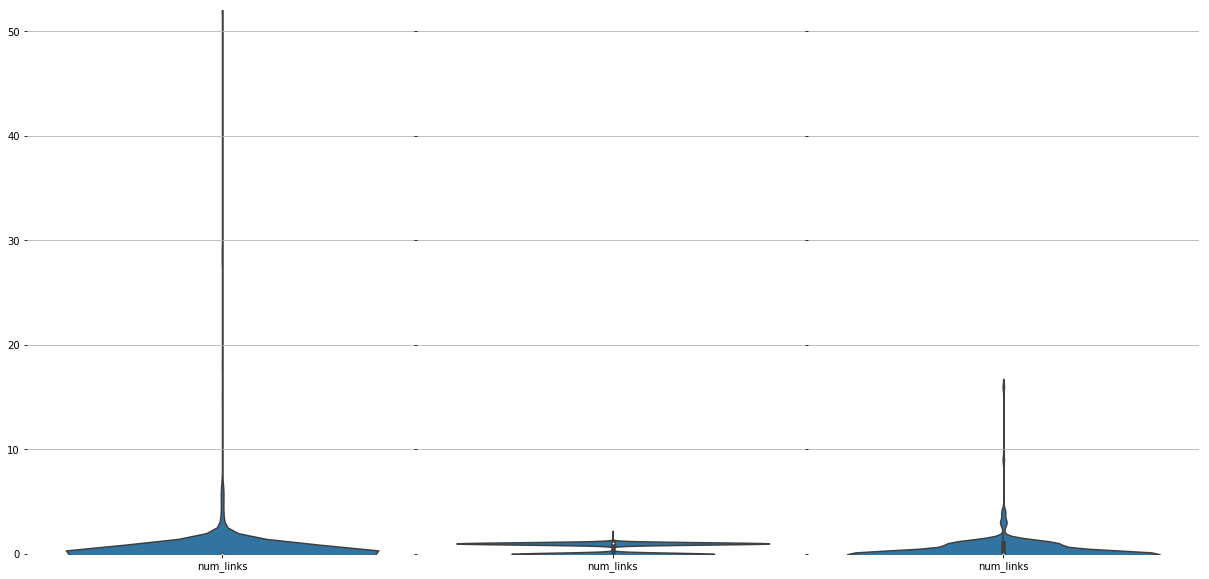

In [68]:
violin_compare(numeric_pages, 'num_links')